## Tutorial 7: Time independent Schrodinger Equation
In this tutorial we will be introduced to eigenvalue problems via the time independent schrodinger equation.
They are more complicated than our previous system because the tri-diagonal matrix that we construct has a few extra terms.

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
def TriD_H(nodes, t, V):
    #nodes is the number of nodes in our 1D system.
    #t is the hbar^2/(2ma^2) component of the Hamiltonian
    #V is a vector of length nodes that contains the potential (voltage) at each node in our potential well
    
    # This is a modified version of the dri-diagonal matrix maker from last time
    assert len(V) == nodes
    
    # Create our empty vector
    TriD = np.zeros((nodes,nodes))
    for i in range(nodes):
        row = np.zeros(nodes)
        if i == 0:
            # First row
            row[i] = 2*t+V[i]
            row[i+1] = -1*t
        elif i == (nodes-1):
            # End row
            row[i-1] = -1*t
            row[i] = 2*t + V[i]
        else:
            # Middle rows
            row[i-1] = -1*t
            row[i] = 2*t + V[i]
            row[i+1] = -1*t
        
        TriD[i,:] = row
    
    return TriD

380.64314436244393


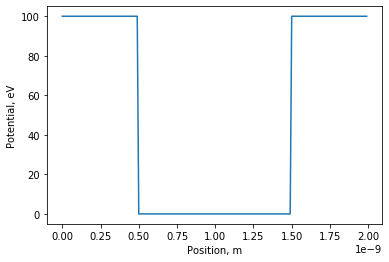

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

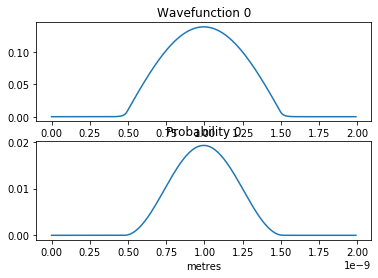

<Figure size 432x288 with 0 Axes>

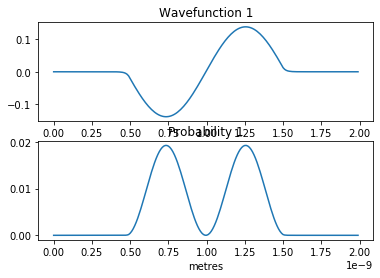

In [163]:
# Some constants
q = 1.602*10**-19
hbar = 1.054*10**-34
m = 9.109*10**-31

# User configurations
well_height = 100 # electron volts
well_width = 1*10**-9 # meters, how wide my potential well is
system_width = 2*well_width # How wide the simulation system is
nodes = 200


# Pre-calculations
a = system_width/nodes
t = hbar**2/(2*m*a**2)/q # normalise system to eV
print(t)
x_vector = np.arange(nodes)*a

# Potential well construction
V = np.zeros(nodes)
# Mine is zero in the middle, a high value outside the middle. The potential well is in the middle of the system
well_size = int(nodes//(system_width/well_width)) # how wide is our well in nodes?
well_start = int((nodes - well_size) / 2)# What node does our well start at?
# Add the walls to our well
V[0:well_start] = well_height
V[well_size+well_start:] = well_height

plt.plot(x_vector,V)
plt.xlabel('Position, m')
plt.ylabel('Potential, eV')
plt.figure()

#print(V)
H = TriD_H(nodes,t,V)
W,vec = np.linalg.eigh(H)
# W is the eigen values, vec is the eigen vectors

max_order = 2
for i in range(max_order):
    plt.figure()
    fig, axs = plt.subplots(2, 1)
    # Plot the wavefunction
    axs[0].plot(x_vector,vec[:,i])
    axs[0].set_title('Wavefunction ' + str(i))
    axs[0].set_xlabel('metres')
    
    # Plot the normalised probability
    axs[1].plot(x_vector,vec[:,i]*np.conj(vec[:,i]))
    axs[1].set_title('Probability ' + str(i))
    axs[1].set_xlabel('metres')




**Beginner Tasks**
1. Work through the code and understand each step.
2. Make the plotting of the wavefunctions and probabilities a bit better looking (look up some matplotlib guides) [optional] 
3. Deterime the units of the X axes for the wave function and probability.
4. Try to ruin things by picking strange values for parameters. What makes the simultion stop working, and why?

**Intermediate Tasks**
1. Calculate the energy differenfce between the eigenstates. Are they what you expect?
2. Modify the potential well to be a harmonic potential well. Do you get the states that you expect to see?

**Advanced Tasks**
1. Modify the potential well to be a double well with a configurable-height and width barrier in the middle. Explore how the parameters of this barrier change the tunneling probability of the electron.

